## embeddings evaluation 

In [34]:
import glob 
from Plot import init_style, to_pgf
import os 
import pandas as pd
from sklearn.metrics import auc, accuracy_score, precision_recall_curve, roc_curve, classification_report
import matplotlib.pyplot as plt

In [35]:
os.chdir("/home/llan/Desktop/WUR/thesis2")


In [36]:
init_style()

## optimal embeddings

In [37]:
files = glob.glob("media/shared_data/binary_labels/PN_1_1/**/*.tsv", recursive=True)[:]

In [38]:
files

['media/shared_data/binary_labels/PN_1_1/G2V/test_predictions.tsv',
 'media/shared_data/binary_labels/PN_1_1/EXP/test_predictions.tsv',
 'media/shared_data/binary_labels/PN_1_1/GO/test_predictions.tsv']

In [39]:
model_type = ["G2V", "EXP", "GO"]

In [40]:
dfs = [pd.read_csv(x, sep="\t", header=0, index_col=0) for x in files]

In [41]:
dfs[0]

TF     TG      pred  label
0     8119  12154  0.999591    1.0
1    34590  12154  0.997546    1.0
2    12404      6  0.194034    0.0
3    15058  36991  0.972982    1.0
4    36966  24802  0.745750    1.0
..     ...    ...       ...    ...
819  22302  26986  0.636469    1.0
820   3443  19455  0.999920    1.0
821   4083      3  0.000001    0.0
822  35279      1  0.002327    0.0
823   3735      1  0.013358    0.0

[824 rows x 4 columns]

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2* 3.54, 3.54))
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

neg, pos = dfs[0].label.value_counts()
prc_baseline = pos/(neg+pos)

ax1.plot([0,1], [0,1], transform=ax1.transAxes, ls="-.", color="red")
ax2.axhline(y=prc_baseline, ls ="-.", color="red")


for df, name in zip(dfs, model_type):
    if name == "GO":
        name = name + " "
    precision, recall, _ = precision_recall_curve(df.label, df.pred)
    fpr, tpr, _ = roc_curve(df.label, df.pred)
    prc_auc= auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    
    ax1.step(fpr, tpr, label=f"{name:<4} (AUC)={roc_auc:.2f}", where="post")
    ax2.step(recall, precision, label=f"{name:<4} (AUC)={prc_auc:.2f}", where="post")

ax1.legend(loc="best")
ax2.legend(loc="best")
to_pgf("representations_update.pgf")
plt.close(fig)

In [43]:
y_p, y_t = dfs[0].iloc[:,2:].to_numpy().T

In [44]:
y_p = (y_p >= 0.5).astype(int)

In [76]:
reports= []
colums = None
for df in dfs: 
    y_p, y_t = df.iloc[:, 2:].to_numpy().T
    y_p = (y_p >= 0.5).astype(int)
    report = classification_report(y_t, y_p, output_dict=True)
    values = list(report["1.0"].values())[:-1]
    values += [report["accuracy"]]
    reports.append(values)
    columns = list(report["1.0"].keys())[:-1] + ["accuracy"]

In [77]:
print(pd.DataFrame(reports, columns = columns, index=model_type).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & accuracy \\
\midrule
G2V & 0.957 & 0.940 & 0.949 & 0.953 \\
EXP & 0.995 & 0.984 & 0.990 & 0.990 \\
GO & 1.000 & 0.990 & 0.995 & 0.995 \\
\bottomrule
\end{tabular}



##### checking data

In [47]:
old_files = glob.glob("media/shared_data/PN_1_1/**/*.tsv")

In [48]:
dfs_old = [pd.read_csv(x, sep="\t", header=0, index_col=0) for x in old_files]

In [49]:
for x in range(3):
    print("old", dfs_old[x].shape, "new", dfs[x].shape)

old (843, 4) new (824, 4)
old (843, 4) new (824, 4)
old (843, 4) new (824, 4)


In [50]:
(dfs[0]["TF"].astype(str) + dfs[0]["TG"].astype(str)).unique().shape

(824,)

### checking the effect of GO computationally derived and automitcally assigned annotations 

In [54]:
go_files = glob.glob("media/shared_data/GO/**/*.tsv")

In [57]:
go_base_file = files[2]

In [60]:
go_files =go_files + [go_base_file]

In [64]:
go_files

['media/shared_data/GO/wo_comp/test_predictions.tsv',
 'media/shared_data/GO/wo_iea/test_predictions.tsv',
 'media/shared_data/binary_labels/PN_1_1/GO/test_predictions.tsv']

In [65]:
go_names = ["Comp (-)", "IEA (-)", "ALL"]

In [61]:
go_dfs = [pd.read_csv(x, sep="\t", header=0, index_col=0) for x in go_files]

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2 * 3.54, 3.54))
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

neg, pos = dfs[0].label.value_counts()
prc_baseline = pos/(neg+pos)

ax1.plot([0,1], [0,1], transform=ax1.transAxes, ls="-.", color="red")
ax2.axhline(y=prc_baseline, ls ="-.", color="red")


for df, name in zip(go_dfs, go_names):
    if name == "GO":
        name = name + " "
    precision, recall, _ = precision_recall_curve(df.label, df.pred)
    fpr, tpr, _ = roc_curve(df.label, df.pred)
    prc_auc= auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    
    ax1.step(fpr, tpr, label=f"{name:<4} (AUC)={roc_auc:.2f}", where="post")
    ax2.step(recall, precision, label=f"{name:<4} (AUC)={prc_auc:.2f}", where="post")

ax1.legend(loc="best")
ax2.legend(loc="best")
to_pgf("go_figure.pgf")
plt.close(fig)

In [78]:
y_p, y_t = go_dfs[0].iloc[:,2:].to_numpy().T

In [79]:
y_p = (y_p >= 0.5).astype(int)

In [80]:
reports= []
colums = None
for df in go_dfs: 
    y_p, y_t = df.iloc[:, 2:].to_numpy().T
    y_p = (y_p >= 0.5).astype(int)
    report = classification_report(y_t, y_p, output_dict=True)
    values = list(report["1.0"].values())[:-1]
    values += [report["accuracy"]]
    reports.append(values)
    columns = list(report["1.0"].keys())[:-1] + ["accuracy"]

In [83]:
print(pd.DataFrame(reports, columns = columns, index=go_names).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & accuracy \\
\midrule
Comp (-) & 0.995 & 0.985 & 0.990 & 0.990 \\
IEA (-) & 1.000 & 0.997 & 0.999 & 0.999 \\
ALL & 1.000 & 0.990 & 0.995 & 0.995 \\
\bottomrule
\end{tabular}



## performance on TF_split dataset

In [84]:
split_files = glob.glob("media/shared_data/binary_labels/TF_split/**/*.tsv")

In [86]:
split_names = ["G2V", "EXP", "GO"]

In [87]:
split_dfs = [pd.read_csv(x, sep="\t", header=0, index_col=0) for x in split_files]

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2 * 3.54, 3.54))
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

neg, pos = dfs[0].label.value_counts()
prc_baseline = pos/(neg+pos)

ax1.plot([0,1], [0,1], transform=ax1.transAxes, ls="-.", color="red")
ax2.axhline(y=prc_baseline, ls ="-.", color="red")


for df, name in zip(split_dfs, split_names):
    if name == "GO":
        name = name + " "
    precision, recall, _ = precision_recall_curve(df.label, df.pred)
    fpr, tpr, _ = roc_curve(df.label, df.pred)
    prc_auc= auc(recall, precision)
    roc_auc = auc(fpr, tpr)
    
    ax1.step(fpr, tpr, label=f"{name:<4} (AUC)={roc_auc:.2f}", where="post")
    ax2.step(recall, precision, label=f"{name:<4} (AUC)={prc_auc:.2f}", where="post")

ax1.legend(loc="best")
ax2.legend(loc="best")
to_pgf("split_figure.pgf")
plt.close(fig)

In [93]:
reports= []
colums = None
for df in split_dfs: 
    y_p, y_t = df.iloc[:, 2:].to_numpy().T
    y_p = (y_p >= 0.5).astype(int)
    report = classification_report(y_t, y_p, output_dict=True)
    values = list(report["1.0"].values())[:-1]
    values += [report["accuracy"]]
    reports.append(values)
    columns = list(report["1.0"].keys())[:-1] + ["accuracy"]

In [95]:
print(pd.DataFrame(reports, columns = columns, index=split_names).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & accuracy \\
\midrule
G2V & 0.672 & 0.713 & 0.692 & 0.682 \\
EXP & 0.869 & 0.897 & 0.883 & 0.881 \\
GO & 0.863 & 0.913 & 0.887 & 0.884 \\
\bottomrule
\end{tabular}



### Multiclass performance

In [98]:
mlc_files = glob.glob("media/shared_data/multiclass_labels/PN_1_1/**/*.tsv")

In [99]:
mlc_files

['media/shared_data/multiclass_labels/PN_1_1/G2V/test_predictions.tsv',
 'media/shared_data/multiclass_labels/PN_1_1/EXP/test_predictions.tsv',
 'media/shared_data/multiclass_labels/PN_1_1/GO/test_predictions.tsv']

In [100]:
mlc_dfs = [pd.read_table(x, index_col=0) for x in mlc_files]

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

In [120]:
label_binarize(label, classes=[0, 1, 2])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [103]:
mlc_names = split_names

In [107]:
mlc_dfs[0].columns

Index(['TF', 'TG', 'pred_0', 'pred_1', 'pred_2', 'label'], dtype='object')

In [137]:
prc_aucs = []
roc_aucs = []
accuracies = []
report = []
columns = mlc_dfs[0].columns[2:-1]

for df in mlc_dfs:
    labels = label_binarize(df.label.to_numpy(), classes=[0,1,2])
    tmp_prc = []
    tmp_roc = []
    accur = []
    for i in range(3):
        label = labels[:, i]
        pred = (df[columns[i]].to_numpy() >= 0.5).astype(int)
        precision, recall, _ = precision_recall_curve(label, pred)
        fpr, tpr, _ = roc_curve(label, pred)
        prc_auc= auc(recall, precision)
        roc_auc = auc(fpr, tpr)
        tmp_prc.append(prc_auc)
        tmp_roc.append(roc_auc)
        accur.append(accuracy_score(label, pred))
    prc_aucs.append(tmp_prc)
    roc_aucs.append(tmp_roc)
    accuracies.append(accur)


        

In [160]:
mlc_dfs[0].loc[mlc_dfs[0]["label"] == 1]
#.loc[mlc_dfs[0].pred_1 > 0.5]

TF     TG    pred_0    pred_1    pred_2  label
1    26986  11740  0.001776  0.441177  0.557048      1
9    28420  28241  0.000181  0.066715  0.933104      1
17   22302   3174  0.018831  0.586481  0.394688      1
20   34244  25600  0.354092  0.259758  0.386151      1
28    8183  26018  0.541029  0.426652  0.032318      1
..     ...    ...       ...       ...       ...    ...
871  30692   2318  0.280373  0.330837  0.388790      1
891  19001  22072  0.000370  0.154917  0.844713      1
893  15512  34992  0.000014  0.263846  0.736140      1
909  34156   8665  0.000156  0.519673  0.480171      1
913  15756   1447  0.024308  0.573263  0.402429      1

[129 rows x 6 columns]

In [161]:
41/129

0.3178294573643411

In [148]:
class_names = ["no-regulation", "repression", "activation"]

In [163]:
print(pd.DataFrame(prc_aucs, columns=class_names, index=mlc_names).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrr}
\toprule
 & no-regulation & repression & activation \\
\midrule
G2V & 0.971 & 0.496 & 0.829 \\
EXP & 0.998 & 0.626 & 0.871 \\
GO & 0.995 & 0.633 & 0.858 \\
\bottomrule
\end{tabular}



In [165]:
print(pd.DataFrame(roc_aucs, columns=class_names, index=mlc_names).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrr}
\toprule
 & no-regulation & repression & activation \\
\midrule
G2V & 0.957 & 0.640 & 0.859 \\
EXP & 0.997 & 0.711 & 0.905 \\
GO & 0.993 & 0.751 & 0.883 \\
\bottomrule
\end{tabular}



In [166]:
print(pd.DataFrame(accuracies, columns=class_names, index=mlc_names).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrr}
\toprule
 & no-regulation & repression & activation \\
\midrule
G2V & 0.957 & 0.871 & 0.868 \\
EXP & 0.997 & 0.898 & 0.899 \\
GO & 0.993 & 0.895 & 0.892 \\
\bottomrule
\end{tabular}



## combining embeddings 

In [13]:
paths = glob.glob("media/shared_data/PN_1_1/combined/linear_model/**/*.tsv", recursive=True)
concat = list(filter(lambda x: "concat" in x, paths))
add = list(filter(lambda x: "add" in x, paths))

In [ ]:
paths 
names = [
    "EXP_G2V_CONC",
    "GO_G2V_CONC",
    "GO_EXP_G2V_CONC",  
    "GO_EXP_CONC",
    "EXP_G2V_ADD",
    "GO_G2V_ADD",
    "GO_EXP_G2V_ADD",  
    "GO_EXP_ADD"
]



In [19]:
dfs = [pd.read_table(x, header=0, index_col=0) for x in paths]

In [16]:
import matplotlib as mpl
mpl.use("tkagg")

/tmp/ipykernel_4277/858301528.py:2: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  mpl.use("tkagg")


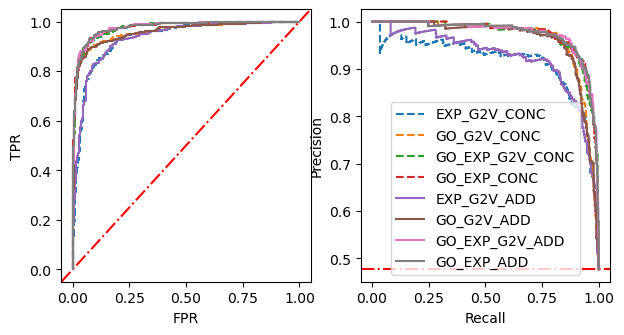

In [ ]:
%matplotlib inline 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2* 3.54, 3.54))
ax1.set_xlabel("FPR")
ax1.set_ylabel("TPR")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

neg, pos = dfs[0].label.value_counts()
prc_baseline = pos/(neg+pos)

ax1.plot([0,1], [0,1], transform=ax1.transAxes, ls="-.", color="red")
ax2.axhline(y=prc_baseline, ls ="-.", color="red")
prc_aucs = []
roc_aucs = []

for df, name in zip(dfs, names):
    precision, recall, _ = precision_recall_curve(df.label, df.pred)
    fpr, tpr, _ = roc_curve(df.label, df.pred)
    prc_auc= prc_aucs.append(auc(recall, precision))
    roc_auc = roc_aucs.append(auc(fpr, tpr))
    ls = "-" if "ADD" in name else "--"
    ax1.step(fpr, tpr, label=f"{name:<4}", where="post", linestyle=ls)
    ax2.step(recall, precision, label=f"{name:<4}", where="post", linestyle=ls)

ax2.legend(loc="lower center")
plt.show()

In [67]:
comb_metrics = pd.DataFrame([roc_aucs, prc_aucs], columns=names, index=["roc_auc", "prc_auc"]).T
reports = []
colums = None
for df, name in zip(dfs, names): 
    y_p, y_t = df.iloc[:, 2:].to_numpy().T
    y_p = (y_p >= 0.5).astype(int)
    report = classification_report(y_t, y_p, output_dict=True)
    values = list(report["1.0"].values())[:-1]
    values += [report["accuracy"]]
    reports.append(values)
    columns = list(report["1.0"].keys())[:-1] + ["accuracy"]

In [72]:
reports = pd.DataFrame(reports, index=names, columns=columns)
comb_metrics_join = comb_metrics.join(reports).sort_values("accuracy", ascending=False)

In [75]:
print(comb_metrics_join.to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lrrrrrr}
\toprule
 & roc_auc & prc_auc & precision & recall & f1-score & accuracy \\
\midrule
GO_EXP_CONC & 0.975 & 0.974 & 0.917 & 0.930 & 0.923 & 0.926 \\
GO_EXP_ADD & 0.976 & 0.974 & 0.900 & 0.943 & 0.921 & 0.923 \\
GO_EXP_G2V_CONC & 0.974 & 0.973 & 0.899 & 0.928 & 0.913 & 0.916 \\
GO_EXP_G2V_ADD & 0.976 & 0.974 & 0.883 & 0.943 & 0.912 & 0.913 \\
GO_G2V_CONC & 0.959 & 0.963 & 0.899 & 0.903 & 0.901 & 0.905 \\
GO_G2V_ADD & 0.958 & 0.961 & 0.874 & 0.913 & 0.893 & 0.896 \\
EXP_G2V_ADD & 0.932 & 0.923 & 0.830 & 0.900 & 0.864 & 0.865 \\
EXP_G2V_CONC & 0.933 & 0.917 & 0.825 & 0.891 & 0.856 & 0.858 \\
\bottomrule
\end{tabular}



## visualizing the G2V embeddings

In [32]:
from pathlib import Path
import pandas as pd
from openTSNE import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


g2v = Path("../gene2vec_data/dataset/g2v_1000emb.tsv")
g2v = pd.read_table(g2v, index_col=0)

row_data = pd.read_table("../EXP/EXP_data/rowdata.csv", usecols=["GeneID", "locustype"])
row_data.set_index("GeneID", inplace=True)
#g2v = pd.merge(g2v, row_data, left_index=True, right_index=True)
exp = pd.read_table("../EXP/expression.tsv", usecols=[0]).values.squeeze()

In [10]:
old = pd.read_table("../tsne_embedding_g2v.tsv", index_col=0)

In [14]:
conv_dict = dict(zip(range(len(exp)), exp))
conv = lambda x: conv_dict[x]
clusters = old[["locustype", "island"]]
clusters.index = [conv(x) for x in clusters.index.tolist()]

In [15]:
from sklearn.cluster import KMeans

def cluster(n, df):
    kmeans = KMeans(n_clusters=n, n_init="auto").fit(df.to_numpy())
    df["clusters"] = kmeans.labels_
    return df 

In [101]:
tsne = TSNE(
    perplexity=100,
    metric="euclidean",
    n_jobs=14,
    random_state=42,
    verbose=True,
)

In [102]:
X = tsne.fit(g2v.to_numpy())

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=14, perplexity=100, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 300 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 23.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.25 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.27 seconds
===> Running optimization with exaggeration=12.00, lr=2681.75 for 250 iterations...
Iteration   50, KL divergence 5.3718, 50 iterations in 1.2938 sec
Iteration  100, KL divergence 5.2853, 50 iterations in 1.4309 sec
Iteration  150, KL divergence 5.2507, 50 iterations in 1.2375 sec
Iteration  200, KL divergence 5.2490, 50 iterations in 1.2594 sec
Iteration  250, KL divergence 5.2471, 50 iterations in 1.3312 sec
   --> Time elapsed: 6.55 seconds
===> Running optimiza

In [130]:
from sklearn.preprocessing import StandardScaler
exp_og = pd.read_table("../EXP/expression.tsv", index_col=0)


In [ ]:

scaler = StandardScaler()
expval = scaler.fit_transform(expval.T)

EX = tsne.fit(expval.T)

In [107]:
X_df = pd.DataFrame(X)
X_df.set_index(g2v.index, inplace=True)
X_df = cluster(30, X_df)
X_df = pd.merge(X_df, clusters, left_index=True, right_index=True)

EX_df = pd.DataFrame(EX)
EX_df.set_index(exp, inplace=True)
EX_df = pd.merge(EX_df, row_data, left_index=True, right_index=True)
# EX_df = pd.merge(EX_df, clusters, left_index=True, right_index=True)




In [108]:
import numpy as np
new_labels = []
for lab in X_df.locustype.tolist():
    if lab in ["antisense_long_noncoding_rna", "long_noncoding_rna"]:
        lab = "non-coding RNA"
    elif lab in ["small_nuclear_rna", "antisense_rna", "ribosomal_rna", "other_rna", "pre_trna", "small_nucleolar_rna", np.nan]:
        lab = "other RNA"
    elif lab == "transposable_element_gene":
        lab = "TE gene"
    new_labels.append(lab)

X_df["binned"] = new_labels

new_labels = []
for lab in EX_df.locustype.tolist():
    if lab in ["antisense_long_noncoding_rna", "long_noncoding_rna"]:
        lab = "non-coding RNA"
    elif lab in ["small_nuclear_rna", "antisense_rna", "ribosomal_rna", "other_rna", "pre_trna", "small_nucleolar_rna", np.nan]:
        lab = "other RNA"
    elif lab == "transposable_element_gene":
        lab = "TE gene"
    new_labels.append(lab)

EX_df["binned"] = new_labels

In [109]:
hue_order=X_df.binned.value_counts().sort_values(ascending=False).index.tolist()

In [110]:
from Plot import init_style

In [111]:
init_style()

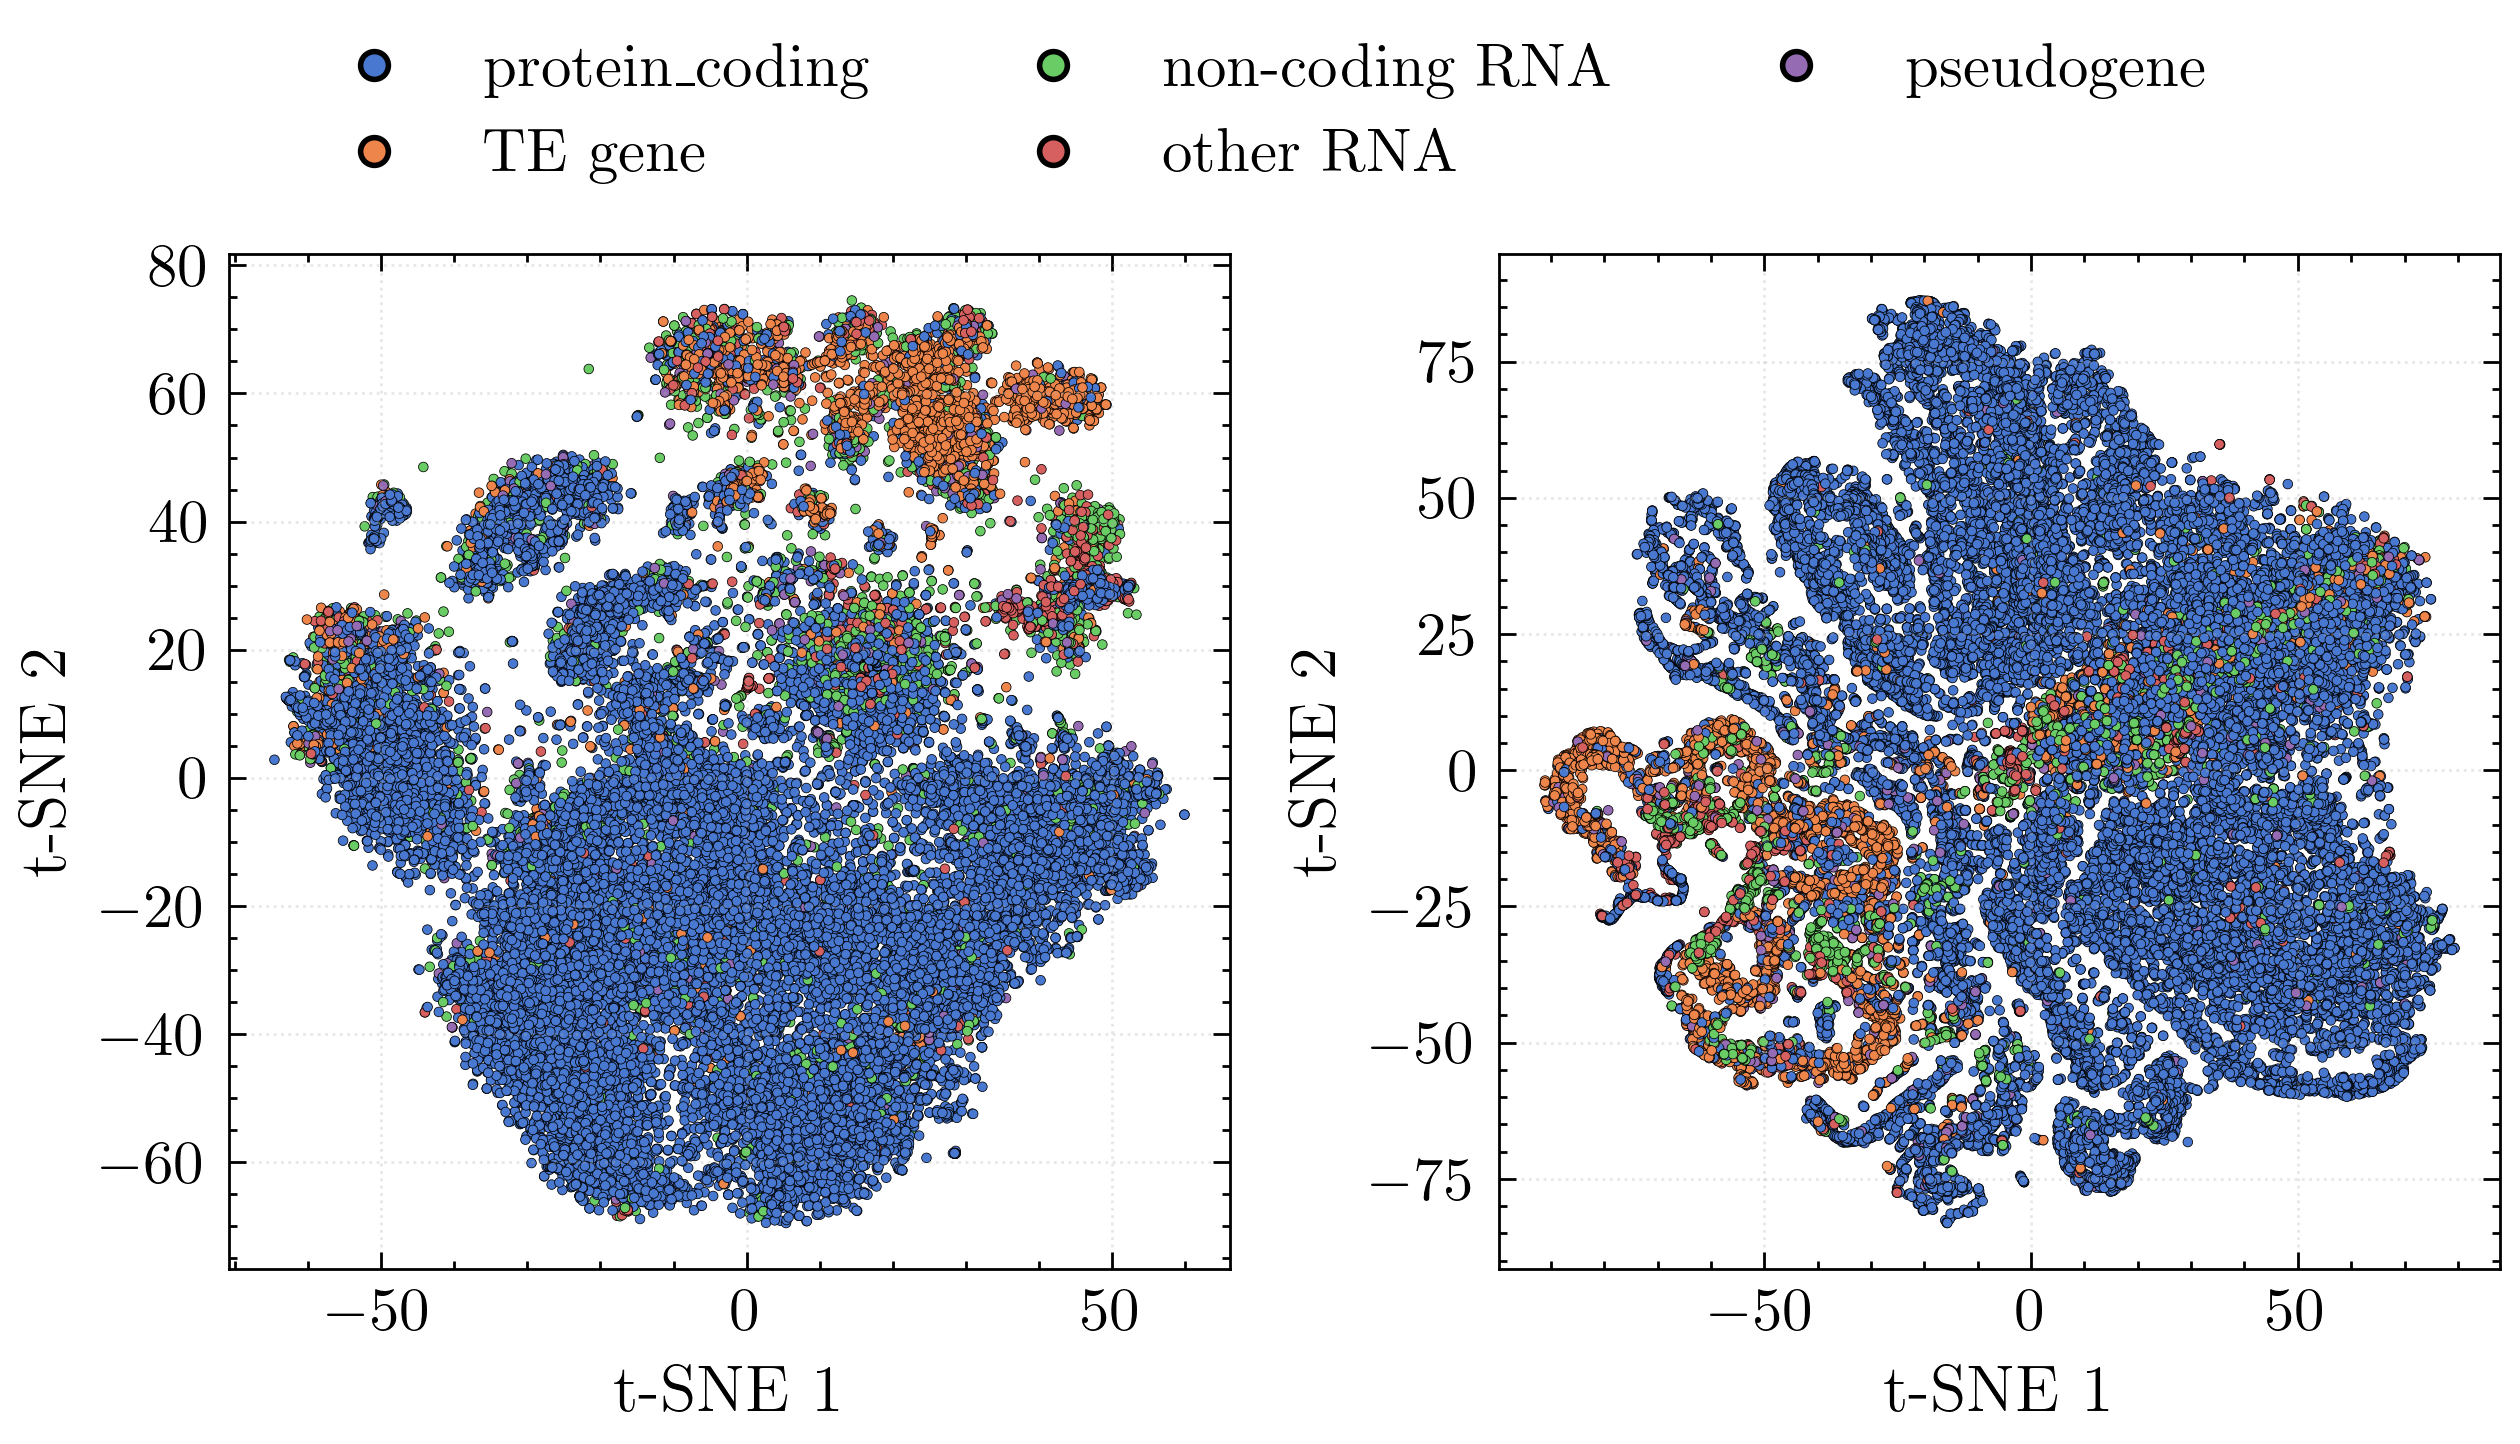

In [126]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 2, figsize=(6.5, 6.5/2))

sns.scatterplot(data=X_df, x=0, y=1, hue="binned", edgecolor="black", alpha=1, s=3, palette="muted", hue_order=hue_order, ax=ax[1])
# plt.annotate("TE island", xy=(-20, 40), xytext=(20, 60), arrowprops=dict(arrowstyle="->"))

legend_handles = [
    Line2D([0], [0], marker='o', color='w', label=label, markersize=5, markerfacecolor=color, markeredgecolor="black")
    for label, color in zip(hue_order, list(sns.color_palette("muted")))
]
ax[1].legend().remove()
fig.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax[1].set_xlabel("t-SNE 1")
ax[1].set_ylabel("t-SNE 2")

# sns.scatterplot(data=X_df, x=0, y=1, hue="binned", edgecolor="grey", alpha=1, s=5, palette=list(COLORS.values()), hue_order=hue_order)
sns.scatterplot(data=EX_df, x=0, y=1, hue="binned", edgecolor="black", alpha=1, s=3, palette="muted", hue_order=hue_order, ax=ax[0])
#plt.annotate("TE island", xy=(0, 200), xytext=(150, 220), arrowprops=dict(arrowstyle="->"))
# legend_handles = [
#     Line2D([0], [0], marker='o', color='w', label=label, markersize=5, markerfacecolor=color, markeredgecolor="black")
#     for label, color in zip(hue_order, sns.color)
# ]

# plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.legend(loc="right").remove()
ax[0].set_xlabel("t-SNE 1")
ax[0].set_ylabel("t-SNE 2")
ax[0].legend().remove()
plt.tight_layout()
plt.savefig("tsne_embeddings.png", dpi=400)

In [157]:
test = pd.merge(exp_og, row_data, left_index=True, right_index=True)
test["categorie"] = new_labels

In [177]:
multi_idx = []
stats = {"genes (n)": [], "counts (median)": [], "counts (mean)": []}

for name, frame in test.groupby(["locustype", "categorie"]):
    multi_idx.append(name)
    stats["genes (n)"].append(frame.shape[0])
    frame = frame.iloc[:, :-2]
    stats["counts (median)"].append(np.median(frame.values.flatten()).item())
    stats["counts (mean)"].append(np.mean(frame.values.flatten()).item())

In [194]:
stats = pd.DataFrame.from_dict(stats)
stats.index = pd.MultiIndex.from_tuples(multi_idx)
stats = stats.sort_values(ascending=False, by="genes (n)")

In [203]:
stats

genes (n)  counts (median)  \
protein_coding               protein_coding      27655         9.907215   
transposable_element_gene    TE gene              3901         0.000000   
long_noncoding_rna           non-coding RNA       2444         0.000000   
antisense_long_noncoding_rna non-coding RNA       1037         0.516524   
pseudogene                   pseudogene            927         0.000000   
pre_trna                     other RNA             689         0.000000   
small_nucleolar_rna          other RNA             287         1.091468   
other_rna                    other RNA             221         0.632041   
small_nuclear_rna            other RNA              80         0.000000   
antisense_rna                other RNA              78         0.000000   
ribosomal_rna                other RNA              15        23.070566   

                                             counts (mean)  
protein_coding               protein_coding      19.576079  
transposable_element_gene    TE gene              0.317729  
long_noncoding_rna           non-coding RNA       0.373872  
antisense_long_noncoding_rna non-coding RNA       3.959258  
pseudogene                   pseudogene           1.294008  
pre_trna                     other RNA            0.797010  
small_nucleolar_rna          other RNA            5.167773  
other_rna                    other RNA            8.583562  
small_nuclear_rna            other RNA            1.595225  
antisense_rna                other RNA            0.997597  
ribosomal_rna                other RNA           49.340436

In [202]:
print(stats.to_latex(float_format=f"%.3f"))

\begin{tabular}{llrrr}
\toprule
 &  & genes (n) & counts (median) & counts (mean) \\
\midrule
protein_coding & protein_coding & 27655 & 9.907 & 19.576 \\
\cline{1-5}
transposable_element_gene & TE gene & 3901 & 0.000 & 0.318 \\
\cline{1-5}
long_noncoding_rna & non-coding RNA & 2444 & 0.000 & 0.374 \\
\cline{1-5}
antisense_long_noncoding_rna & non-coding RNA & 1037 & 0.517 & 3.959 \\
\cline{1-5}
pseudogene & pseudogene & 927 & 0.000 & 1.294 \\
\cline{1-5}
pre_trna & other RNA & 689 & 0.000 & 0.797 \\
\cline{1-5}
small_nucleolar_rna & other RNA & 287 & 1.091 & 5.168 \\
\cline{1-5}
other_rna & other RNA & 221 & 0.632 & 8.584 \\
\cline{1-5}
small_nuclear_rna & other RNA & 80 & 0.000 & 1.595 \\
\cline{1-5}
antisense_rna & other RNA & 78 & 0.000 & 0.998 \\
\cline{1-5}
ribosomal_rna & other RNA & 15 & 23.071 & 49.340 \\
\cline{1-5}
\bottomrule
\end{tabular}



In [12]:
plt.scatter(g2v["0"], g2v["1"], c=g2v["island"], s=20)
plt.savefig("g2v_tsne.png", dpi=400)

In [14]:
import os 

In [20]:
import seaborn as sns

In [19]:
plt.scatter(g2v["0"], g2v["1"], c=g2v["island"], s=10)
plt.show()

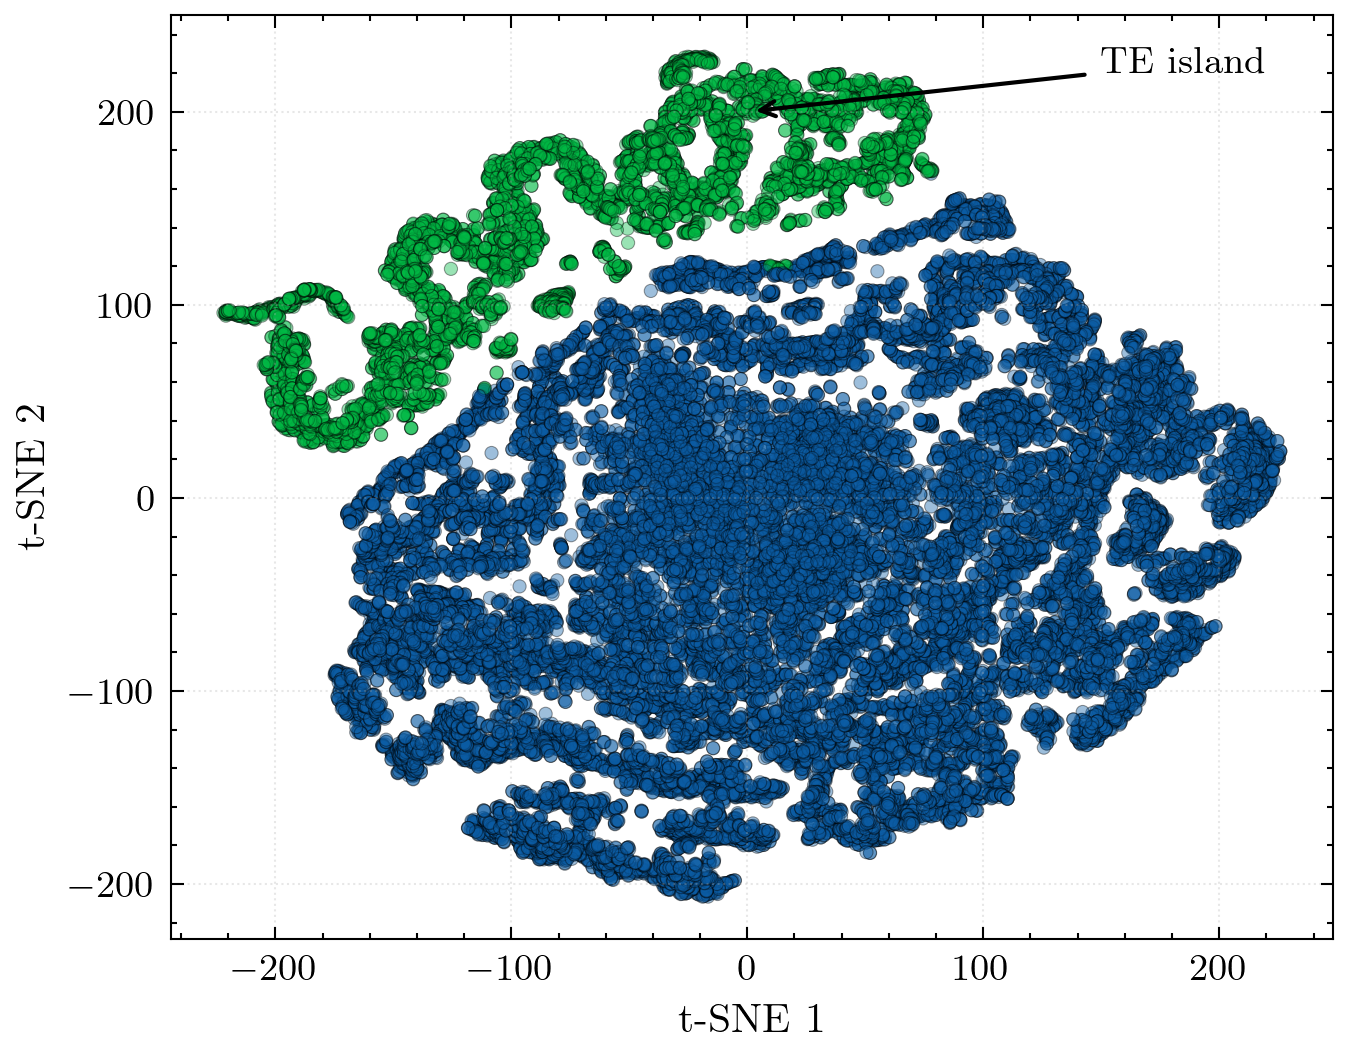

In [88]:
%matplotlib inline
sns.scatterplot(data=g2v, x="0", y="1", hue="island", edgecolor="black", alpha=0.4, s=10)
plt.annotate("TE island", xy=(0, 200), xytext=(150, 220), arrowprops=dict(arrowstyle="->"))
plt.legend().remove()
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.savefig("g2v_embeddings.png", dpi=400)

In [49]:
island = g2v.loc[g2v["cluster"].isin([1, 8, 3])].locustype.value_counts().to_dict()

In [52]:
island2 = dict()
for key, val in island.items():
    if val < 200:
        island2["other"] = island2.get("other", 0) + val
    else:
        island2[key] = val

In [53]:
island2

{'transposable_element_gene': 2992,
 'protein_coding': 1160,
 'long_noncoding_rna': 615,
 'pre_trna': 319,
 'pseudogene': 277,
 'antisense_long_noncoding_rna': 233,
 'other': 297}

In [62]:
g2v.locustype.value_counts()

locustype
protein_coding                  24928
transposable_element_gene        3650
long_noncoding_rna               1420
pseudogene                        723
antisense_long_noncoding_rna      532
pre_trna                          417
small_nucleolar_rna               236
other_rna                         165
small_nuclear_rna                  53
antisense_rna                      42
ribosomal_rna                      14
Name: count, dtype: int64

In [55]:
island2["TEs"] = island2.pop("transposable_element_gene")

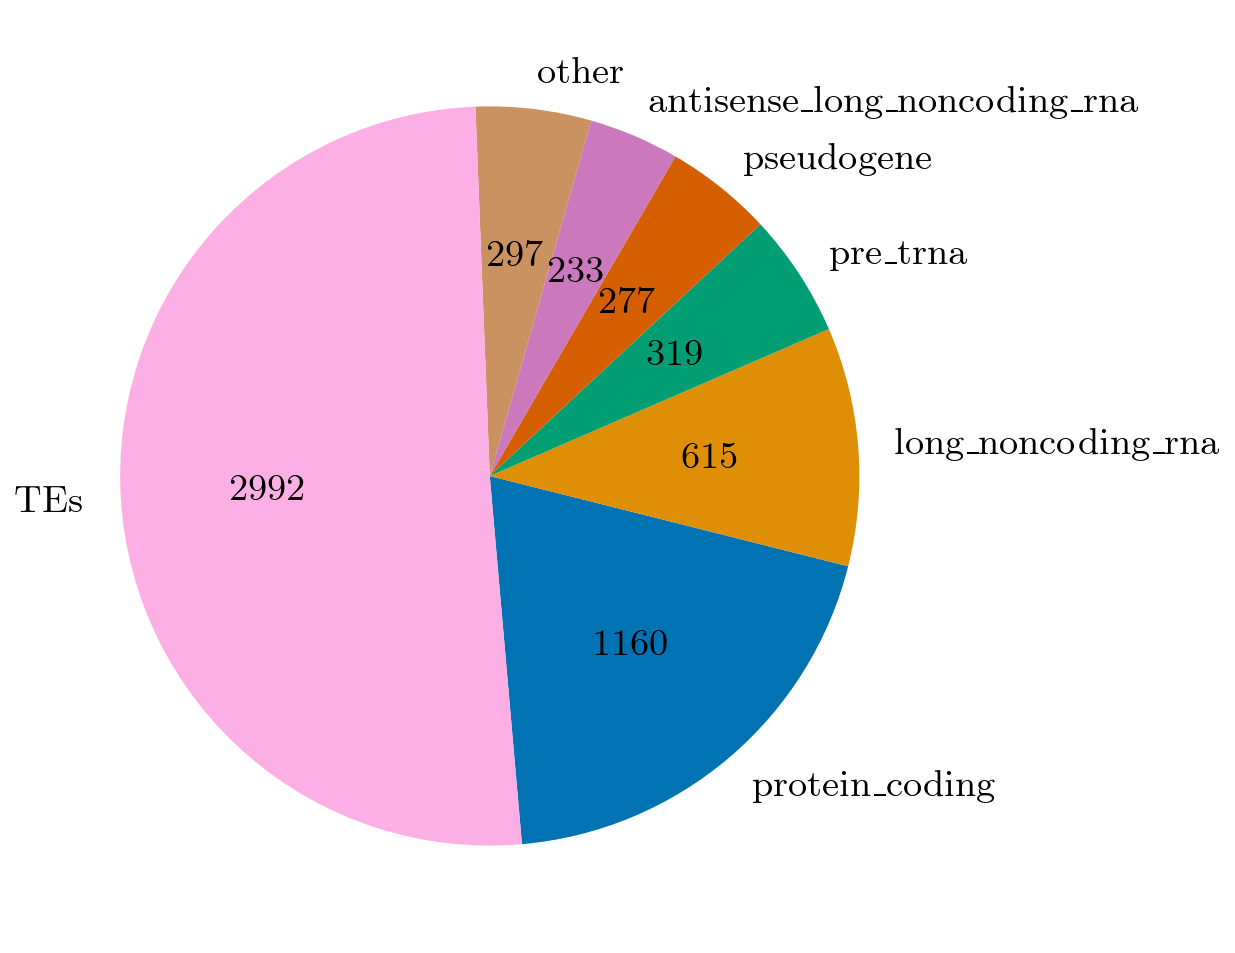

In [76]:
colors = sns.color_palette("colorblind", len(island2))  # Seaborn discrete colormap

# Slightly smaller font
plt.rcParams.update({'font.size': 9})

# Create pie chart
plt.pie(
    island2.values(), 
    labels=island2.keys(), 
    startangle=275, 
    autopct=lambda x: '{:.0f}'.format(x * sum(island2.values()) / 100), 
    colors=colors
)
plt.savefig("g2v_pie.png", dpi=400)
